<a href="https://colab.research.google.com/github/rajeevan094/machinelearnig/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1

scenario 1

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


In [2]:
# Load dataset
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

# View first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.tail()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
12457,537381,22632,HAND WARMER RED RETROSPOT,24.0,12/6/2010 13:13,2.10,14667.0,United Kingdom
12458,537381,22633,HAND WARMER UNION JACK,20.0,12/6/2010 13:13,2.10,14667.0,United Kingdom
12459,537381,22867,HAND WARMER BIRD DESIGN,24.0,12/6/2010 13:13,2.10,14667.0,United Kingdom
12460,537381,22601,CHRISTMAS RETROSPOT ANGEL WOOD,17.0,12/6/2010 13:13,0.85,14667.0,United Kingdom
12461,537381,22603,CHRISTMAS RETRO,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12462 entries, 0 to 12461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    12462 non-null  object 
 1   StockCode    12462 non-null  object 
 2   Description  12417 non-null  object 
 3   Quantity     12461 non-null  float64
 4   InvoiceDate  12461 non-null  object 
 5   UnitPrice    12461 non-null  float64
 6   CustomerID   8956 non-null   float64
 7   Country      12461 non-null  object 
dtypes: float64(3), object(5)
memory usage: 779.0+ KB


In [5]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,12461.000000,12461.000000,8956.000000
mean,7.477249,3.973280,15598.129299
std,93.885564,17.253932,1748.194062
min,-9360.000000,0.000000,12395.000000
25%,1.000000,1.250000,14307.000000
50%,2.000000,2.510000,15646.000000
75%,6.000000,4.210000,17211.000000
max,2880.000000,940.870000,18239.000000


In [6]:
df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,12462,12462,12417,12461.000000,12461,12461.000000,8956.000000,12461
unique,585,2168,2136,NaN,504,NaN,NaN,15
top,537237,22632,HAND WARMER SCOTTY DOG DESIGN,NaN,12/6/2010 9:58,NaN,NaN,United Kingdom
freq,597,75,72,NaN,597,NaN,NaN,11806
mean,NaN,NaN,NaN,7.477249,NaN,3.973280,15598.129299,NaN
std,NaN,NaN,NaN,93.885564,NaN,17.253932,1748.194062,NaN
min,NaN,NaN,NaN,-9360.000000,NaN,0.000000,12395.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,14307.000000,NaN
50%,NaN,NaN,NaN,2.000000,NaN,2.510000,15646.000000,NaN
75%,NaN,NaN,NaN,6.000000,NaN,4.210000,17211.000000,NaN


In [7]:
# Count missing values per column
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,45
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,3506
Country,1


In [8]:
(df.isnull().sum() / len(df)) * 100


,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.361098
Quantity,0.008024
InvoiceDate,0.008024
UnitPrice,0.008024
CustomerID,28.133526
Country,0.008024


In [11]:
# Example: Drop missing CustomerID
df = df.dropna(subset=['CustomerID'])


In [12]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


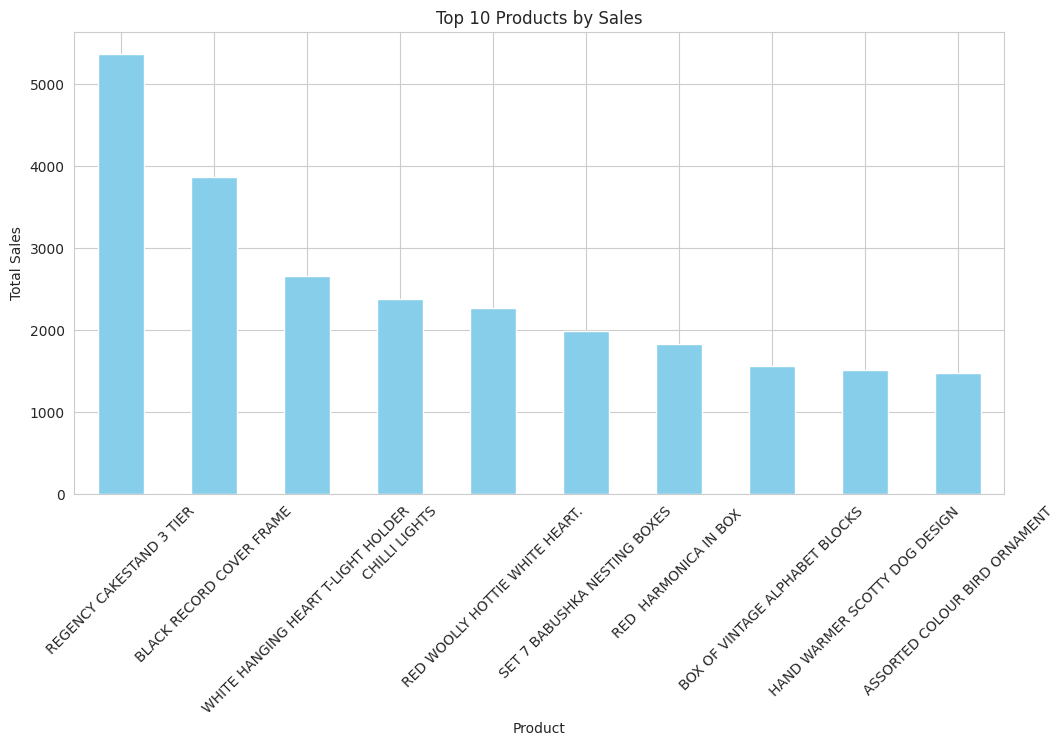

In [14]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


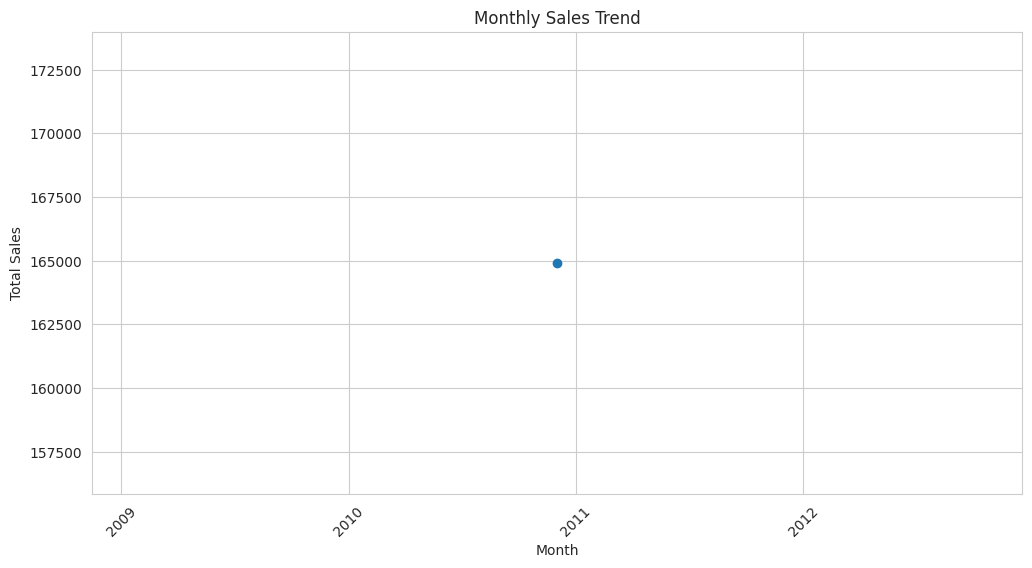

In [15]:
# Create Month column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


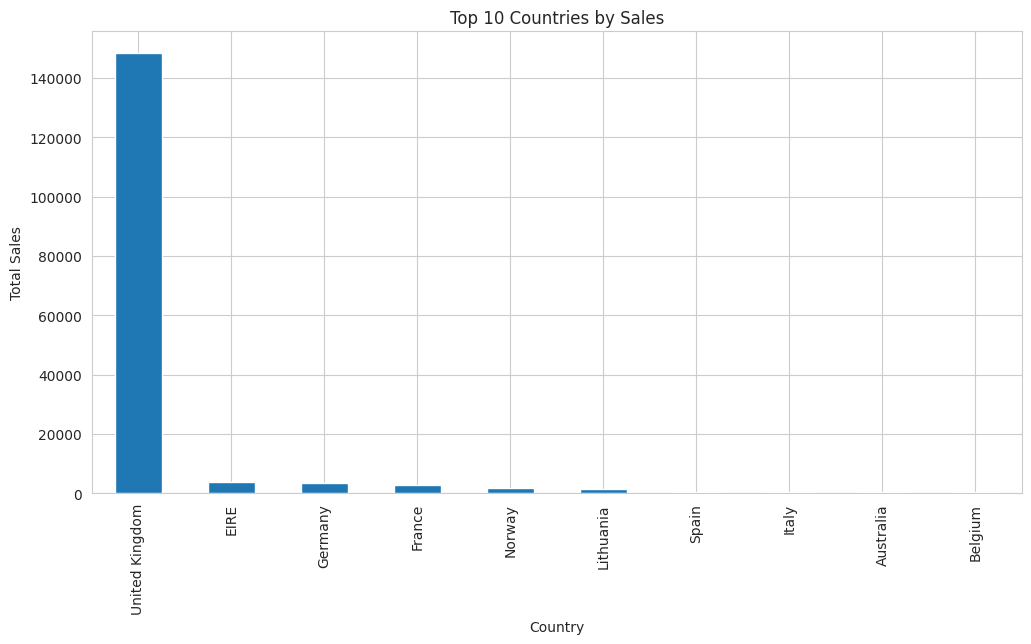

In [16]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
country_sales.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Sales")
plt.ylabel("Total Sales")
plt.show()
